In [1]:
import pandas as analytics
from locations import ptb_training_path ,ptb_testing_path
from model_builder import model_builder

2024-04-17 00:30:58.846425: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 00:30:59.703258: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df_training_corpus = analytics.read_csv(ptb_training_path, header = None, names = ['data'])
df_testing_corpus = analytics.read_csv(ptb_testing_path, header = None, names = ['data'])

df_training_corpus = df_training_corpus.sample(frac = 1)
df_testing_corpus = df_testing_corpus.sample(frac = 1)

df_training_corpus = df_training_corpus[:10000] 
df_testing_corpus = df_testing_corpus[:3000]


print("Train \n",df_training_corpus.head(3))
print("\n\nTest \n",df_testing_corpus.head(3))

Train 
                                                     data
12956   at this week 's new york city bond sale trade...
10772                there is a small <unk> on the wall 
18808   the film producer owned by <unk> financier <u...


Test 
                                                    data
2952   even though it will be independent of officia...
2431   the consensus view expects a N N increase in ...
1898   N N N to N days N N N to N days N N N to N da...


In [3]:
architecture = {
    "model" : None,
    "embedding_dimension" : 100,
    "type_of_cells" : "gru",
    "number_of_cells" : 80,
    "dropout_percentage" : 0.2,
    "max_epochs" : 100
}
data = {
    "train":df_training_corpus,
    "test":df_testing_corpus
}


Extracting training corpus ....  Training corpus extracted successfully !


Tokenising the corpus .... 
Total Number of Unique Words [VOCABULARY] : 8994
Corpus be tokenised successfully !


Generating input sequence ....  Input sequence generated successfully !
Optimal Sequence Length : 43


Compiling model ....  Modelled compiled successfully with GRU cells!
Fit for training ! Training can be done !!!


2024-04-17 00:31:02.345198: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


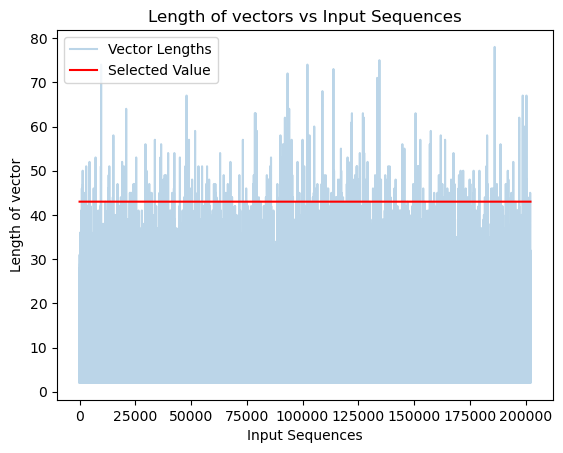

In [4]:
mb = model_builder(architecture = architecture, data = data)

In [ ]:
mb.train_model()

Epoch 1/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 144s 22ms/step - accuracy: 0.0939 - loss: 6.6461
Epoch 2/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.1682 - loss: 5.6189
Epoch 3/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.1958 - loss: 5.2123
Epoch 4/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.2134 - loss: 4.9175
Epoch 5/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.2311 - loss: 4.6758
Epoch 6/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.2393 - loss: 4.4936
Epoch 7/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 141s 22ms/step - accuracy: 0.2519 - loss: 4.3317
Epoch 8/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.2624 - loss: 4.1868
Epoch 9/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 141s 22ms/step - accuracy: 0.2712 - loss: 4.0718
Epoch 10/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.2818 - loss: 3.9637
Epoch 11/100
6320/6320 ━━━━━━━━━━━━━━━━━━━━ 141s 22ms/step - accuracy: 0.2884 -

In [ ]:
mb.model.save("trained_model_10k.keras")

In [ ]:
mb.model.summary()

In [ ]:
mb.test_model()